In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.

#create a dictionary that stores the query and the last entry will be the most recent
dictionary={}
for data in session.query(Base.classes.measurement):
    dictionary = data.__dict__
    
#recent picks up the last entry, and the code below is to modify it to look like yyyy-mm-dd
recent = dt.datetime.strptime(dictionary['date'], '%Y-%m-%d')
recent.strftime('%Y-%m-%d')

#get all the days within a year range of the 'recent' date
dts = pd.date_range(recent-dt.timedelta(days=365),recent,freq='d')

dates =[]

#store all those dates in this array. We will be referencing this array later on in this notebook
for date in dts:
    dates.append(date.date().strftime('%Y-%m-%d'))
#most recent is the last entry
dates[len(dates)-1]

'2017-08-23'

(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

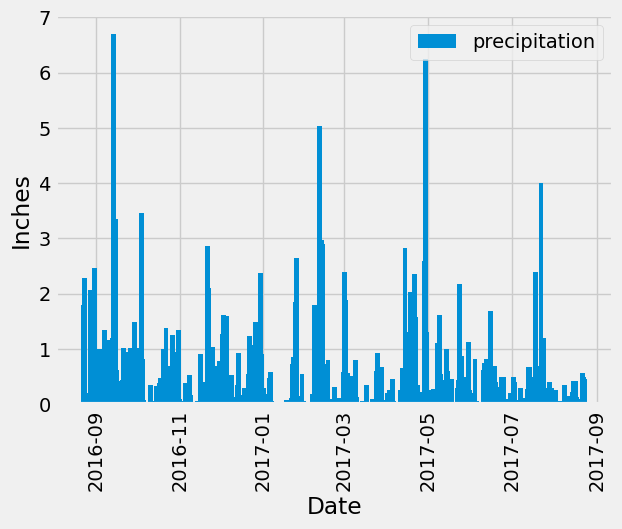

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.
#Did this on the cell above










# Use Pandas Plotting with Matplotlib to plot the data
measure = Base.classes.measurement

precip=[]
dates_2=[]

# Perform a query to retrieve the data and precipitation scores
for day in dates:
    prcp=0
    for drip in session.query(measure).filter(measure.date ==day).all():
        try:
            prcp=drip.__dict__['prcp']
            dates_2.append(day)
            precip.append(prcp)
            
        except:
            if(np.isnan([drip.__dict__['prcp']])):
                prcp=0
            else:
                prcp=drip.__dict__['prcp']
            dates_2.append(day)
            precip.append(prcp)
            
for i in range(len(dates_2)):
    dates_2[i] = dt.datetime.strptime(dates_2[i], '%Y-%m-%d').date()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dataframe = pd.DataFrame({'Dates':dates_2, 'precipitation':precip})

# Sort the dataframe by date
dataframe.sort_values("Dates")

#graphing only the max precipitation for each date
df =dataframe.groupby("Dates").aggregate("max").reset_index()

plt.bar(df['Dates'], df['precipitation'],width=3.5)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.rcParams["figure.figsize"] = (7.5,5)
plt.legend(["precipitation"])
plt.xticks(rotation='vertical')


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
dataframe.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = Base.classes.station
stat=session.query(stations)
stat.count()

9

In [17]:


# Design a query to find the most active stations (i.e. which stations have the most rows?)
stations_list=[]
count=[]
for station in session.query(stations):
    stations_list.append(station.__dict__['station'])
    count.append(session.query(measure).where(measure.station==station.__dict__['station']).count())

# List the stations and their counts in descending order.
station_df = pd.DataFrame({"station":stations_list, "count": count})
station_df.sort_values("count", ascending =False)


,station,count
6,USC00519281,2772
0,USC00519397,2724
1,USC00513117,2709
5,USC00519523,2669
8,USC00516128,2612
2,USC00514830,2202
7,USC00511918,1979
3,USC00517948,1372
4,USC00518838,511


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_count_station=[]
for info in session.query(measure).where(measure.station=='USC00519281').all():
    high_count_station.append(info.__dict__['tobs'])
    
high_count_np = np.array(high_count_station)
result_tuple = [(high_count_np.min(), high_count_np.max(), high_count_np.mean())]
print(result_tuple)

[(54.0, 85.0, 71.66378066378067)]


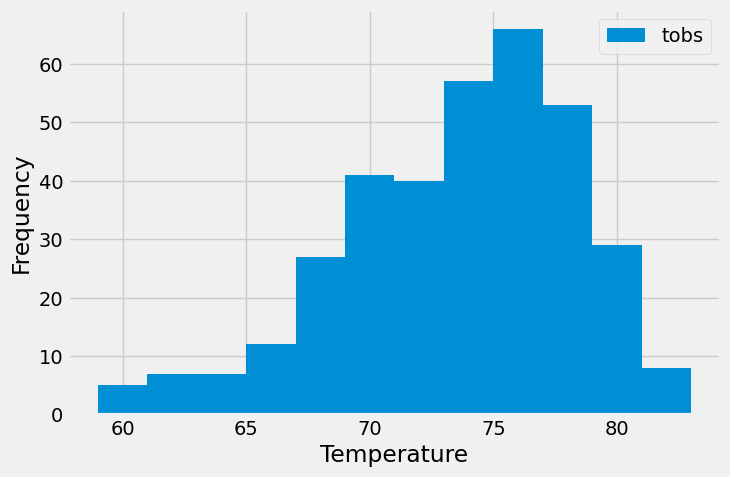

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature=[]
for date in dates:
    try:
        temperature.append(session.query(measure).where(measure.station=='USC00519281').where(measure.date==date).first().__dict__['tobs'])
    except:
        pass
temp_df = pd.DataFrame({"tobs": temperature})
temp_df.plot(kind="hist", bins=12 )
plt.xlabel("Temperature")
plt.show()




# Close Session

In [ ]:
# Close Session
session.close()